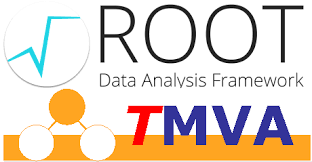

# Machine Learning using ROOT's TMVA

Author : Muhammad Hilmi

The Toolkit for Multivariate Data Analysis with ROOT (TMVA) provides a machine learning environment for the processing and evaluation of multivariate classification. TMVA helps a lot for application in high-energy physics. The machine learning in this notebook is for the classification of quark and gluon jets 
This notebook will cover on packages of ROOT-TMVA:
- Boosted Decision Tree
- Support Vector Machine
- Likelihood
- Artificial Neural Networks
- Deep Neural Networks




In [2]:
import ROOT

import numpy as np
import pandas as pd 

Welcome to JupyROOT 6.24/02


In [3]:
import os, sys, glob, collections

ROOT.gROOT.SetBatch()
ROOT.gStyle.SetOptStat(0)
ROOT.TMVA.Tools.Instance()

####  Output file for the trained dataset 

This is created as we will use this file to analyse the result

In [4]:
MethodName 	= "ML"
outFileName	= MethodName + "_output.root"
outputFile 	= ROOT.TFile(outFileName, "RECREATE")

#### Declaring Signal Tree

The signal Tree is created by a chain that have collections of files containg TTree objects from the jetTree

In [5]:
sigTree	= ROOT.TChain('jetTree')

#### Accessing the open data

In [6]:
inFileName 	= '../files/JetNtuple_RunIISummer16_13TeV_MC_'

for ifile in range (1,2):
	sigTree.Add(inFileName+str(ifile)+"_skimmed.root")

#### ROOT TMVA Data Loader and Factory

We need to start by initializing TMVA and build a Factiry which holds our analysis, and loading the data with a DataLoader.

In [61]:
dataLoader	= ROOT.TMVA.DataLoader("dataset")
factory		= ROOT.TMVA.Factory(MethodName + "_Train", outputFile, "!V:!Silent:Color:DrawProgressBar:Transformations=I;D;P;G,D:AnalysisType=Classification")

####  jetTree for Signal and Background

The data Loader that is created will holds the actual signal and background events.

In [8]:
bkgTree = sigTree.Clone("tree_bkg")

sigCut 	= "(isPhysUDS==1)"
bkgCut	= "(isPhysG==1)"

dataLoader.AddSignalTree(sigTree)
dataLoader.AddBackgroundTree(bkgTree)

dataLoader.Print()

DataSetInfo              : [dataset] : Added class "Signal"
                         : Add Tree jetTree of type Signal with 28614 events
DataSetInfo              : [dataset] : Added class "Background"
                         : Add Tree tree_bkg of type Background with 28614 events
OBJ: TMVA::DataLoader	dataset	Configurable


#### Declaring variable for data Loader

The variable is chosen to observe and to identify the quarks and gluons.
It is determined by certain requirements:

1. Multiplicities

    Gluon have higher values of multiplicities than quark. The simplest and most studied variable that can be used is the multiplicity, i.e. the total number of PFCandidates reconstructed within the jet


2. Jet Shapes

    Quark jets are expected to produce narrower jets and therefore lower values of the axes variables (with respect to gluon jets of the same pTD)
    

3. Fragmentation function 

    Quarks have a harder fragmentation function compared to gluons and are therefore more likely to produce jets with hard constituents that carry a significant fraction of the jet energy. So, quarks have higher pTD then gluons.

In [66]:
varList = ['jetPt', 'jetEta', 'QG_mult', 'QG_ptD', 'QG_axis2']
for var in varList:
	dataLoader.AddVariable(var)

#### Weight for Signal and Background

Individual events can be weighted, with the weights being a column or a function of columns of the input data sets.

In [10]:
dataLoader.SetSignalWeightExpression("eventWeight")
dataLoader.SetBackgroundWeightExpression("eventWeight")

#### Prepare to Training and Test Tree

The input events that are handed to the Factory are internally copied and split into one training and one test ROOT tree. The Tree must be trained to guarantees a statistically independent evaluation of the MVA algorithms based on the test sample.

In [11]:
dataLoader.PrepareTrainingAndTestTree(sigCut, bkgCut, "SplitMode=Random:NormMode=NumEvents:!V")

### Booking Method of Factory 

blablabla

****Boosted Decision Tree****

In [12]:
factory.BookMethod(dataLoader, ROOT.TMVA.Types.kBDT, "BDTG", "!H:!V:NTrees=1000:MinNodeSize=2.5%:BoostType=Grad:Shrinkage=0.10:UseBaggedBoost:BaggedSampleFraction=0.5:nCuts=20:MaxDepth=2")

Factory                  : Booking method: BDTG
                         : 
                         : the option NegWeightTreatment=InverseBoostNegWeights does not exist for BoostType=Grad
                         : --> change to new default NegWeightTreatment=Pray
                         : Building event vectors for type 2 Signal
                         : Dataset[dataset] :  create input formulas for tree jetTree
                         : Dataset[dataset] :  create input formulas for tree jetTree
                         : Building event vectors for type 2 Background
                         : Dataset[dataset] :  create input formulas for tree jetTree
                         : Dataset[dataset] :  create input formulas for tree jetTree
DataSetFactory           : [dataset] : Number of events in input trees
                         : Dataset[dataset] :     Signal     requirement: "(isPhysUDS==1)"
                         : Dataset[dataset] :     Signal          -- number of events p

****Likelihood****

In [13]:
factory.BookMethod(dataLoader, ROOT.TMVA.Types.kLikelihood, "LikelihoodKDE", "!H:!V:!TransformOutput:PDFInterpol=KDE:KDEtype=Gauss:KDEiter=Adaptive:KDEFineFactor=0.3:KDEborder=None:NAvEvtPerBin=50")

Factory                  : Booking method: LikelihoodKDE
                         : 


****Support Vector Machine****

In [14]:
factory.BookMethod(dataLoader, ROOT.TMVA.Types.kSVM, "SVM", "")

Factory                  : Booking method: SVM
                         : 


****Artifical Neural Networks****

In [15]:
factory.BookMethod(dataLoader, ROOT.TMVA.Types.kCFMlpANN, "CF_ANN", "" )

Factory                  : Booking method: CF_ANN
                         : 
                         : Use configuration (nodes per layer): in=5:5:4:2=out
                         : Use 3000 training cycles


****Deep Neural Networks****

In [16]:
factory.BookMethod(dataLoader, ROOT.TMVA.Types.kDL, "DNN", )

Factory                  : Booking method: DNN
                         : 
                         : Will now use the CPU architecture with BLAS and IMT support !


blabla

#### Training dataset

In [17]:
factory.TrainAllMethods()
factory.TestAllMethods()
factory.EvaluateAllMethods()

ROOT.TMVA.TMVAGui(outFileName)

Factory                  : Train all methods
Factory                  : [dataset] : Create Transformation "I" with events from all classes.
                         : 
                         : Transformation, Variable selection : 
                         : Input : variable 'jetPt' <---> Output : variable 'jetPt'
                         : Input : variable 'jetEta' <---> Output : variable 'jetEta'
                         : Input : variable 'QG_mult' <---> Output : variable 'QG_mult'
                         : Input : variable 'QG_ptD' <---> Output : variable 'QG_ptD'
                         : Input : variable 'QG_axis2' <---> Output : variable 'QG_axis2'
Factory                  : [dataset] : Create Transformation "D" with events from all classes.
                         : 
                         : Transformation, Variable selection : 
                         : Input : variable 'jetPt' <---> Output : variable 'jetPt'
                         : Input : variable 'jetEta' <---> Ou

0%, time left: unknown
6%, time left: 2 sec
12%, time left: 2 sec
18%, time left: 2 sec
25%, time left: 2 sec
31%, time left: 2 sec
37%, time left: 2 sec
43%, time left: 1 sec
50%, time left: 1 sec
56%, time left: 1 sec
62%, time left: 1 sec
68%, time left: 1 sec
75%, time left: 0 sec
81%, time left: 0 sec
87%, time left: 0 sec
93%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
12%, time left: 0 sec
18%, time left: 0 sec
25%, time left: 0 sec
31%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
81%, time left: 0 sec
88%, time left: 0 sec
94%, time left: 0 sec
0%, time left: unknown
6%, time left: 0 sec
12%, time left: 0 sec
18%, time left: 0 sec
25%, time left: 0 sec
31%, time left: 0 sec
37%, time left: 0 sec
44%, time left: 0 sec
50%, time left: 0 sec
56%, time left: 0 sec
63%, time left: 0 sec
69%, time left: 0 sec
75%, time left: 0 sec
81%, time 

#### Plotting the ROC

In [42]:
from plotting_helpers import *

colors = [ROOT.kGreen+2, ROOT.kBlue+2, ROOT.kRed+2, ROOT.kMagenta+2]

METHOD     = "ML"
FILENAME   = METHOD + "_output.root" 
OUTDIR     = "./PNG/"

PLOT_ROC = True
PLOT_KST = True

TAIL = ".png"

In [47]:
def main(fileName):

  file    = ROOT.TFile(fileName, "OPEN")
  dataset = file.Get("dataset")
  
  hNameROC = "_rejBvsS" # name of ROC histograms
  hNameKST = "_Train"   # training histograms

  xTitle = "Signal Efficiency"
  yTitle = "Background Rejection"
  fTitle = yTitle + " versus " + xTitle

  methodDict = {}
  histoList  = {}
  histoDict  = {}

  #
  # Access first directory to obtain keys for 2nd directory
  #

  keyList = dataset.GetListOfKeys()

  for key in keyList:
    if "Method" in key.GetName():
        methodDict["mother"] = {}
        methodDict["daughter"] = {}
        methodDict["mother"][key.GetName()] = dataset.Get(key.GetName())

  #
  # Obtain keys for final directory
  #
  for method in methodDict["mother"]:

    keyList = methodDict["mother"][method].GetListOfKeys()

    for methodKey in keyList:
      methodName = methodKey.GetName()
      histoDict[methodName] = {}
      methodDict["daughter"][methodName] = methodDict["mother"][method].Get(methodName)

      #
      # Clone histograms
      #
      if PLOT_ROC: 
        histoDict[methodName]["ROC"]      = methodDict["daughter"][methodName].Get("MVA_"+methodName+hNameROC     ).Clone()
      
      if PLOT_KST:
        histoDict[methodName]["SigTrain"] = methodDict["daughter"][methodName].Get("MVA_"+methodName+hNameKST+"_S").Clone()
        histoDict[methodName]["BkgTrain"] = methodDict["daughter"][methodName].Get("MVA_"+methodName+hNameKST+"_B").Clone()
        histoDict[methodName]["SigTest"]  = methodDict["daughter"][methodName].Get("MVA_"+methodName+"_S"         ).Clone()
        histoDict[methodName]["BkgTest"]  = methodDict["daughter"][methodName].Get("MVA_"+methodName+"_B"         ).Clone()

      plotKST(histoDict[methodName], methodName)

  plotROC(histoDict)

In [64]:
 def plotKST(histoDict, methodName):

  canv = ROOT.TCanvas("canvKST"+methodName, "canv", 800, 800)

  #
  # Setup legends and histograms
  #
  lgd = ROOT.TLegend(0.55, 0.85, 0.95, 0.975)

  sigTrain = histoDict["SigTrain"]
  bkgTrain = histoDict["BkgTrain"]
  sigTest  = histoDict["SigTest"] 
  bkgTest  = histoDict["BkgTest"] 

  ROOT.TMVA.TMVAGlob.NormalizeHists(sigTrain, bkgTrain)
  ROOT.TMVA.TMVAGlob.NormalizeHists(sigTest,  bkgTest)
  ROOT.TMVA.TMVAGlob.SetSignalAndBackgroundStyle(sigTest, bkgTest)
  sigTest.SetLineWidth(1)
  bkgTest.SetLineWidth(1)

  #
  # Setup frame
  #
  frame = SetupFrame(sigTest, bkgTest, methodName)
  frame.Draw()

  canv.GetPad(0).SetLeftMargin(0.105)
  frame.GetYaxis().SetTitleOffset(1.2)

  #
  # Overlay signal and background test histos
  #
  sigTest.Draw("same hist")
  bkgTest.Draw("same hist")
  sigTrain.Draw("e1 same")
  bkgTrain.Draw("e1 same")

  lgd.AddEntry(sigTest,  "Signal (test)",      "F")
  lgd.AddEntry(bkgTest,  "Background (test)",  "F")
  lgd.AddEntry(sigTrain, "Signal (train)",     "E1")
  lgd.AddEntry(bkgTrain, "Background (train)", "E1")

  #
  # K-S Test
  #
  kolS = sigTest.KolmogorovTest(sigTrain, "X")
  kolB = bkgTest.KolmogorovTest(bkgTrain, "X")

  tt1    = ROOT.TText(0.15, 0.89,   "Kolmogorov-Smirnov Test")
  tt2    = ROOT.TText(0.15, 0.865, "Sig = "+str(kolS))
  tt3    = ROOT.TText(0.15, 0.84,  "Bkg = "+str(kolB))

  for text in [tt1, tt2, tt3]:
    text.SetNDC()
    text.SetTextSize(0.032)
    text.AppendPad()


  lgd.Draw()
  canv.Print(OUTDIR+"KST_"+methodName+TAIL)

  frame.Draw("same axis")

In [65]:
def plotROC(histoDict):

  #
  # Declare ROC canvas with grids, and the corresponding attributes
  #
  canv = ROOT.TCanvas("canvROC", "canv", 800, 800)
  canv.SetGrid()
  canv.SetTicks()

  #
  # Plot legends and histograms
  #
  lgd = ROOT.TLegend(0.2, 0.2, 0.6, 0.3)

  i = 0
  for methodName in histoDict:
    histo = histoDict[methodName]["ROC"]
    histo.SetLineColor(colors[i])
    FormatAxisText(histo, xTitle="Signal Efficiency", yTitle="Background Rejection (1-#epsilon_{B})", yOffset=1.2)
    histo.GetXaxis().SetRangeUser(0., 1.0)
    histo.SetMaximum(1.01)
    histo.SetMinimum(0.0)
    histo.SetLineWidth(2)
    histo.Draw("csame")

    lgd.AddEntry(histo, methodName.replace("_", " "), "l")
    i += 1

  lgd.Draw()
  # canv.SetLogy()
  canv.Print(OUTDIR+"ROC"+TAIL)